<a href="https://colab.research.google.com/github/jokavishe/support2-machinelearning-project/blob/main/models_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to load in future files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Download Miniconda installation script
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh

# Make the script executable
!chmod +x Miniconda3-latest-Linux-x86_64.sh

# Install Miniconda
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Update Conda
!conda update -n base -c defaults conda -y

# Append path to be able to run conda
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-12-11 00:48:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120986213 (115M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 115.38M   192MB/s    in 0.6s    

2023-12-11 00:48:31 (192 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [120986213/120986213]

PREFIX=/usr/local
Unpacking payload ...
                                                                                 
Installing base environment...





Preparing transaction: - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.
    You currently have a PYTHONPATH environment v

In [3]:
# Create the environment from your file (Need to upload the file to CoLab first)
!conda env create -f environment.yml

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / done

qt-main-5.15.8       | 58.3 MB   | :   0% 0/1 [00:00<?, ?it/s]
pillow-10.1.0        | 44.3 MB   | :   0% 0/1 [00:00<?, ?it/s]

libllvm15-15.0.7     | 31.8 MB   | :   0% 0/1 [00:00<?, ?it/s]


libllvm14-14.0.6     | 30.0 MB   | :   0% 0/1 [00:00<?, ?it/s]



python-3.11.4        | 29.3 MB   | :   0% 0/1 [00:00<?, ?it/s]




pandoc-3.1.3         | 28.0 MB   | :   0% 0/1 [00:00<?, ?it/s]





scipy-1.11.4         | 15.3 MB   | :   0% 0/1 [00:00<?, ?it/s]






pandas-2.0.3         | 14.0 MB   | :   0% 0/1 [00:00<?, ?it/s]







icu-73.2             | 11.5 MB   | :   0% 0/1 [00:00<?, ?it/s]








statsmodels-0.14.0   | 11.5 MB   | :   0% 0/1 [00:00<?, ?it/s]









scikit-learn-1.3.0   | 9.2 MB    | :   0% 0/1 [00:00<?, ?it/s]










libclang13-15.0.7    | 9.1 MB    | :   0% 0/1 [00:00<?, ?it/s]











numpy-1.24.4         | 7.5 MB    | :   0% 0/1 [00:00<?, ?it/s]






In [6]:
print("Please restart the runtime to use the newly installed environment, or use the following command in a new cell:")
print("!source activate [your-environment-name]")

Please restart the runtime to use the newly installed environment, or use the following command in a new cell:
!source activate [your-environment-name]


In [10]:
!source activate data1030

In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import ParameterGrid,  train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import xgboost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning

In [12]:
df = pd.read_csv("/content/drive/MyDrive/midterm/support2.csv")
df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [13]:
#Functions to use
def find_nulls(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have more than n missing instances'''
    null_series = dataframe.isnull().sum().where(lambda x: x > n).dropna()
    return null_series

def find_null_ints(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have exactly n missing instances'''
    null_series_int = dataframe.isnull().sum().where(lambda x: x == n).dropna()
    null_series_int_list = null_series_int.index.to_list()
    return null_series_int, null_series_int_list

def plot_dists(feature_to_plot):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature_to_plot], bins=50, kde=True)
    plt.title(f'Distribution of {feature_to_plot}')
    plt.xlabel(f'{feature_to_plot}')
    plt.ylabel('Frequency')
    plt.show()

def unique_vals_all(df):
    df_objects = df.dtypes.where(lambda x: x == 'object').dropna().index.to_list()
    for o in df_objects:
        print(f"{o} unique values: {df[o].unique()}")

def confusion_matrix_plots(model, y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f'{model} (CV) Best Model Confusion Matrix')
    plt.show()

    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap='Blues', square=True, ax=ax)

    label_names = np.unique(y_true)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'{model} (CV) Best Model % Confusion Matrix')
    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)
    plt.show()


In [14]:
print(df.shape)

extreme_null_df = df.dropna() # Dataframe if you dropped ALL missing value
print(extreme_null_df.shape)

(9105, 47)
(306, 47)


In [15]:
null_df = df[df.isnull().any(axis=1)]
print(f"Percentage of rows with at least one missing value: {null_df.shape[0] / df.shape[0]}")

null_features = find_nulls(df, 0).index.to_list()
print(f"There are {len(null_features)} features with at least one missing values. \n These features are: {null_features}")

# Percentage of each feature that are missing
missing_feature_percentages = {}
for n in null_features:
    null_percent = null_df[null_df[n].isnull()].shape[0] / df.shape[0]
    missing_feature_percentages[n] =  null_percent
    print(f"Percentage of {n} features missing: {null_percent}")

Percentage of rows with at least one missing value: 0.9663920922570016
There are 33 features with at least one missing values. 
 These features are: ['edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2']
Percentage of edu features missing: 0.17946183415705655
Percentage of income features missing: 0.3275123558484349
Percentage of scoma features missing: 0.00010982976386600769
Percentage of charges features missing: 0.018890719384953323
Percentage of totcst features missing: 0.09752883031301483
Percentage of totmcst features missing: 0.3816584294343767
Percentage of avtisst features missing: 0.00900604063701263
Percentage of race features missing: 0.004612850082372323
Percentage of sps features missing: 0.00010982976386600769
Percentage of aps features missing: 

In [16]:
# Drop all the features with only one missing values
null_ones = df.isnull().sum().where(lambda x: x == 1).dropna().index.to_list()
df.dropna(subset=null_ones, inplace=True)
print(df.shape)

# Drop all the rows with in features less than 100 missing values
null_greater_than_one = find_nulls(df, 0).where(lambda x: x < 100).dropna().index.to_list()
df.dropna(subset=null_greater_than_one, inplace=True)
print(df.shape)

df.dropna(subset=['income', 'edu', 'charges', 'sfdm2'], inplace=True)

values = {'alb': 3.5, 'pafi' : 333.3, 'bili' : 1.01, 'crea' : 1.01, 'bun' : 6.51, 'wblc' : 9, 'urine' : 2502, 'ph' : 7.415534,
          'glucose' : 159.640000, 'adlp' : 1.162239, 'adls' : 1.621342, 'totcst' : 30241.998476, 'totmcst': 12646.000000, 'prg2m' : 0.700000, 'prg6m' :0.500000}
df.fillna(value=values, inplace=True)
print(df.shape)

(9103, 47)
(8888, 47)
(5049, 47)


# ML ALGOS with SSS

In [ ]:
#Logistic Regression Model
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

nr_states = 5
final_models_log_cv = []
test_scores_log_cv = np.zeros(nr_states)

y_true_cm_log_cv = []
y_pred_cm_log_cv = []

ordinal_ftrs = ['income']
ordinal_cats = [['under $11k', '$25-$50k', '$11-$25k', '>$50k']]
onehot_ftrs = ['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']
std_ftrs = ['age', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
            'surv2m', 'surv6m', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
            'bili', 'crea', 'sod', 'glucose', 'bun', 'urine', 'adlsc']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

prep = Pipeline(steps=[('preprocessor', preprocessor)])

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10)
}

for i in range(nr_states):
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=i)
    for other_index, test_index in sss.split(X, y):
        X_other, X_test = X.iloc[other_index], X.iloc[test_index]
        y_other, y_test = y.iloc[other_index], y.iloc[test_index]

    sss_val = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=i)
    for train_index, val_index in sss_val.split(X_other, y_other):
        X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
        y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)

    train_score = []
    val_score = []
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        # Compatibility check
        if params['solver'] in ['liblinear', 'saga'] or params['penalty'] in ['l2', 'none']:
            if params['penalty'] == 'elasticnet' and params['solver'] != 'saga':
                continue
            if params['penalty'] != 'elasticnet' and 'l1_ratio' in params:
                continue

            print('   ', params)

            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning)

                try:
                    clf = LogisticRegression(**params, random_state=i, max_iter=10000)
                    clf.fit(X_train_prep, y_train)
                except ValueError as e:
                    print("Error:", e)
                    continue

                models.append(clf)
                y_train_pred = clf.predict(X_train_prep)
                train_score.append(accuracy_score(y_train, y_train_pred))
                y_val_pred = clf.predict(X_val_prep)
                val_score.append(accuracy_score(y_val, y_val_pred))
                print('   ', train_score[-1], val_score[-1])
        else:
            continue

    if val_score:
        best_model_index = np.argmax(val_score)
        print('best model parameters:', models[best_model_index].get_params())
        print('corresponding validation score:', val_score[best_model_index])

        final_models_log_cv.append(models[best_model_index])
        y_test_pred = final_models_log_cv[-1].predict(X_test_prep)
        test_scores_log_cv[i] = accuracy_score(y_test, y_test_pred)

        print('test score:', test_scores_log_cv[i])

        #calculate for future confusion matrix
        y_true_cm_log_cv.extend(y_test.tolist())
        y_pred_cm_log_cv.extend(y_test_pred.tolist())
    else:
        print(f"No valid model found for state {i}")

print("Average Test Score:", np.mean(test_scores_log_cv))
print("Standard Deviation of Test Scores:", np.std(test_scores_log_cv))


    {'C': 0.0001, 'l1_ratio': 0.0, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.1111111111111111, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.2222222222222222, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.3333333333333333, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.4444444444444444, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.5555555555555556, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.6666666666666666, 'penalty': 'elasticnet', 'solver': 'saga'}
    0.7436332767402377 0.7430673457838144
    {'C': 0.0001, 'l1_ratio': 0.7777777777777777, 'penalty': 'elasticn

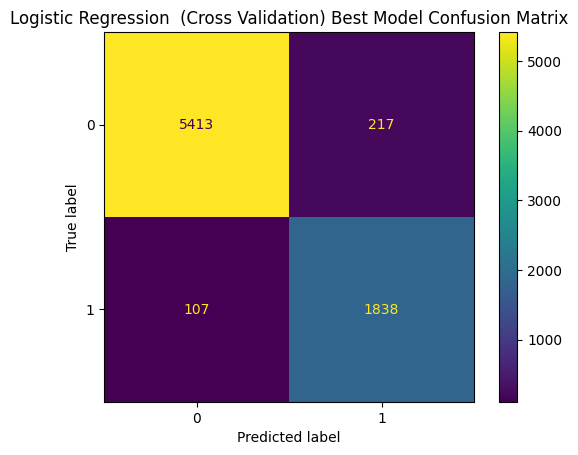

In [ ]:
log_cv_cm = confusion_matrix(y_true_cm_log_cv, y_pred_cm_log_cv)
disp = ConfusionMatrixDisplay(log_cv_cm)
disp.plot()
plt.title('Logistic Regression  (Cross Validation) Best Model Confusion Matrix')
plt.show()

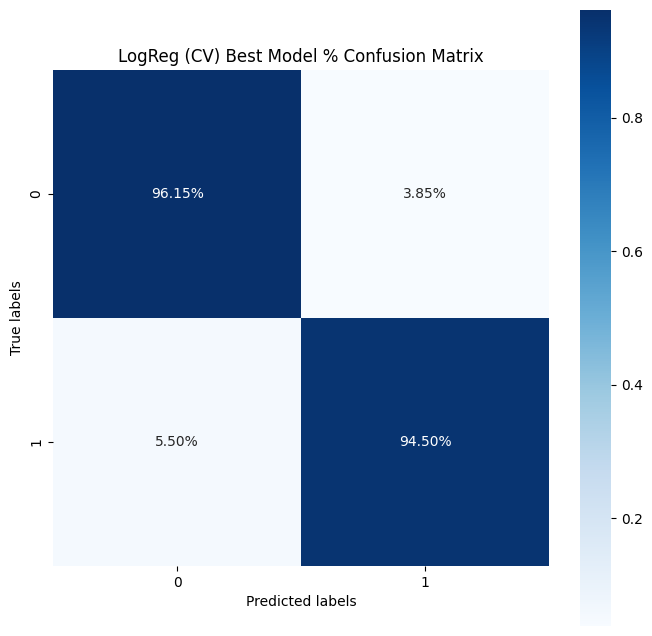

In [ ]:
cm_percent = log_cv_cm.astype('float') / log_cv_cm.sum(axis=1)[:, np.newaxis]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap='Blues', square=True, ax=ax)

# Labels, title and ticks
label_names = np.unique(y_true_cm_log_cv) # Replace with your class names if you have any
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('LogReg (CV) Best Model % Confusion Matrix')
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()

#### Random Forests

In [ ]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

nr_states = 3
test_scores_rfc_cv = np.zeros(nr_states)
final_models_rfc_cv = []


y_true_cm_rfc_cv = []
y_pred_cm_rfc_cv = []

ordinal_ftrs = ['income']
ordinal_cats = [['under $11k', '$25-$50k', '$11-$25k', '>$50k']]
onehot_ftrs = ['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']
std_ftrs = ['age', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
            'surv2m', 'surv6m', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
            'bili', 'crea', 'sod', 'glucose', 'bun', 'urine', 'adlsc']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

prep = Pipeline(steps=[('preprocessor', preprocessor)])

param_grid = {
'n_estimators': [100, 200, 300, 400, 500],
'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'bootstrap': [True, False],
'criterion': ['gini', 'entropy']
}

for i in range(nr_states):
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=i)
    for train_index, test_index in sss.split(X, y):
        X_other, X_test = X.iloc[train_index], X.iloc[test_index]
        y_other, y_test = y.iloc[train_index], y.iloc[test_index]

    sss_val = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=i)
    for train_index, val_index in sss_val.split(X_other, y_other):
        X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
        y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)

    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        print('   ', params)
        clf = RandomForestClassifier(**params,random_state = i,n_jobs=-1)
        clf.fit(X_train_prep, y_train)
        models.append(clf)

        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train, y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val, y_val_pred)
        print('   ', train_score[p], val_score[p])

    print('best model parameters:', ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:', np.max(val_score))
    final_models_rfc_cv.append(models[np.argmax(val_score)])
    y_test_pred = final_models_rfc_cv[-1].predict(X_test_prep)
    test_scores_rfc_cv[i] = accuracy_score(y_test, y_test_pred)
    print('test score:', test_scores_rfc_cv[i])


    #calculate for future confusion matrix
    y_true_cm_rfc_cv.extend(y_test.tolist())
    y_pred_cm_rfc_cv.extend(y_test_pred.tolist())

print("Average Test Score:", np.mean(test_scores_rfc_cv))
print("Standard Deviation of Test Scores:", np.std(test_scores_rfc_cv))


Streaming output truncated to the last 5000 lines.
    1.0 0.9728353140916808
    {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
    1.0 0.9734012450481041
    {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
    1.0 0.9717034521788341
    {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
    0.9988681380871534 0.9739671760045274
    {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
    0.9988681380871534 0.9711375212224108
    {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
    0.998868138087153

#### Decision Trees

In [ ]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

nr_states = 3
test_scores_dt_cv = np.zeros(nr_states)
final_models_dt_cv = []


y_true_cm_dt_cv = []
y_pred_cm_dt_cv = []

ordinal_ftrs = ['income']
ordinal_cats = [['under $11k', '$25-$50k', '$11-$25k', '>$50k']]
onehot_ftrs = ['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']
std_ftrs = ['age', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
            'surv2m', 'surv6m', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
            'bili', 'crea', 'sod', 'glucose', 'bun', 'urine', 'adlsc']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

prep = Pipeline(steps=[('preprocessor', preprocessor)])

param_grid = {
'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['best', 'random'],
'max_depth': [None, 10, 30, 50],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2', None],
'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
'min_impurity_decrease': [0, 0.01, 0.1]
}


for i in range(nr_states):
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=i)
    for train_index, test_index in sss.split(X, y):
        X_other, X_test = X.iloc[train_index], X.iloc[test_index]
        y_other, y_test = y.iloc[train_index], y.iloc[test_index]

    sss_val = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=i)
    for train_index, val_index in sss_val.split(X_other, y_other):
        X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
        y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)

    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        print('   ', params)
        clf = DecisionTreeClassifier(**params,random_state = i)
        clf.fit(X_train_prep, y_train)
        models.append(clf)

        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train, y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val, y_val_pred)
        print('   ', train_score[p], val_score[p])

    print('best model parameters:', ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:', np.max(val_score))
    final_models_dt_cv.append(models[np.argmax(val_score)])
    y_test_pred = final_models_dt_cv[-1].predict(X_test_prep)
    test_scores_dt_cv[i] = accuracy_score(y_test, y_test_pred)
    print('test score:', test_scores_dt_cv[i])


    #calculate for future confusion matrix
    y_true_cm_dt_cv.extend(y_test.tolist())
    y_pred_cm_dt_cv.extend(y_test_pred.tolist())

print("Average Test Score:", np.mean(test_scores_dt_cv))
print("Standard Deviation of Test Scores:", np.std(test_scores_dt_cv))


Streaming output truncated to the last 5000 lines.
    0.7917374080362196 0.7775891341256367
    {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
    0.8273910582908885 0.8330503678551217
    {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
    0.7917374080362196 0.7775891341256367
    {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
    0.8273910582908885 0.8330503678551217
    {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
    0.7917374080

#### SVC

In [17]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

nr_states = 5
test_scores_svc_cv = np.zeros(nr_states)
final_models_svc_cv = []


y_true_cm = []
y_pred_cm = []

ordinal_ftrs = ['income']
ordinal_cats = [['under $11k', '$25-$50k', '$11-$25k', '>$50k']]
onehot_ftrs = ['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']
std_ftrs = ['age', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
            'surv2m', 'surv6m', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
            'bili', 'crea', 'sod', 'glucose', 'bun', 'urine', 'adlsc']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

prep = Pipeline(steps=[('preprocessor', preprocessor)])


param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'coef0': [0, 0.5, 1]
}


for i in range(nr_states):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=i)
    for train_index, test_index in sss.split(X, y):
        X_other, X_test = X.iloc[train_index], X.iloc[test_index]
        y_other, y_test = y.iloc[train_index], y.iloc[test_index]

    sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=i)
    for train_index, val_index in sss_val.split(X_other, y_other):
        X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
        y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)

    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        print('   ', params)
        clf = SVC(**params,random_state = i)
        clf.fit(X_train_prep, y_train)
        models.append(clf)

        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train, y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val, y_val_pred)
        print('   ', train_score[p], val_score[p])

    print('best model parameters:', ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:', np.max(val_score))
    final_models_svc_cv.append(models[np.argmax(val_score)])
    y_test_pred = final_models_svc_cv[-1].predict(X_test_prep)
    test_scores_svc_cv[i] = accuracy_score(y_test, y_test_pred)
    print('test score:', test_scores_svc_cv[i])

    #calculate for future confusion matrix
    y_true_cm.extend(y_test.tolist())
    y_pred_cm.extend(y_test_pred.tolist())

print("Average Test Score:", np.mean(test_scores_svc_cv))
print("Standard Deviation of Test Scores:", np.std(test_scores_svc_cv))


Streaming output truncated to the last 5000 lines.
    1.0 0.8873797396717601
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
    1.0 0.8924731182795699
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'scale', 'kernel': 'sigmoid'}
    0.8488964346349746 0.8539898132427843
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'auto', 'kernel': 'linear'}
    1.0 0.8924731182795699
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'scale', 'kernel': 'sigmoid'}
    0.8488964346349746 0.8539898132427843
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'auto', 'kernel': 'linear'}
    0.9869835880022637 0.9869835880022637
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
    1.0 0.8873797396717601
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
    0.9869835880022637 0.9869835880022637
    {'C': 1000, 'coef0': 0, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
    1.0 0.8873797396717601
    {'C': 1000, 'coef0': 0,

#### XGB Classifier

In [ ]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

nr_states = 3
test_scores_xgb_cv = np.zeros(nr_states)
final_models_xgb_cv = []


y_true_cm_xgbc_cv = []
y_pred_cm_xgbc_cv = []

ordinal_ftrs = ['income']
ordinal_cats = [['under $11k', '$25-$50k', '$11-$25k', '>$50k']]
onehot_ftrs = ['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']
std_ftrs = ['age', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
            'surv2m', 'surv6m', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
            'bili', 'crea', 'sod', 'glucose', 'bun', 'urine', 'adlsc']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

prep = Pipeline(steps=[('preprocessor', preprocessor)])

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

for i in range(nr_states):
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=i)
    for train_index, test_index in sss.split(X, y):
        X_other, X_test = X.iloc[train_index], X.iloc[test_index]
        y_other, y_test = y.iloc[train_index], y.iloc[test_index]

    sss_val = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=i)
    for train_index, val_index in sss_val.split(X_other, y_other):
        X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
        y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)

    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        print('   ', params)
        clf = xgboost.XGBClassifier(**params,random_state = i)

        clf.fit(X_train_prep, y_train)
        models.append(clf)

        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train, y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val, y_val_pred)
        print('   ', train_score[p], val_score[p])

    print('best model parameters:', ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:', np.max(val_score))
    final_models_xgb_cv.append(models[np.argmax(val_score)])
    y_test_pred = final_models_xgb_cv[-1].predict(X_test_prep)
    test_scores_xgb_cv[i] = accuracy_score(y_test, y_test_pred)
    print('test score:', test_scores_xgb_cv[i])

    #calculate for future confusion matrix
    y_true_cm_xgbc_cv.extend(y_test.tolist())
    y_pred_cm_xgbc_cv.extend(y_test_pred.tolist())

print("Average Test Score:", np.mean(test_scores_xgb_cv))
print("Standard Deviation of Test Scores:", np.std(test_scores_xgb_cv))


Streaming output truncated to the last 5000 lines.
    1.0 0.9773627617430674
    {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.9}
    1.0 0.9779286926994907
    {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.6}
    0.9932088285229203 0.9734012450481041
    {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}
    0.9943406904357668 0.9779286926994907
    {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
    0.9954725523486134 0.9790605546123373
    {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
    0.9971703452178834 0.9779286926994907
    {'c